

# Ikeda-based nonlinear delayed dynamics for application to secure optical transmission systems using chaos
References: 

[Ikeda-based nonlinear delayed dynamics for application to secure optical transmission systems using chaos, L. Larger, C.R. Physique 5 (2004)](https://www.sciencedirect.com/science/article/pii/S1631070504001045)

[Optoelectronic oscillators with time-delayed feedback, L. Larger et al., Rev. Mod. Phys. 91, 035006 (2019)](https://journals.aps.org/rmp/abstract/10.1103/RevModPhys.91.035006)

[Using Synchronization for Prediction of High-Dimensional Chaotic Dynamics, R. Roy et al., Phys. Rev. Lett. 101, 154102 (2008)](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.101.154102)

Lecture note from Classical Mechanics class by F. Guistino

----
## 1. Introduction

We are going to explore a nonlinear delayed differential equations (NLDDEs) using python. NLDDEs is an important dynamical system because it can generate a highly chaotic dynamical system for encryption and .... 

## 2. Experimental Motivation

As a physicist, it is always wise to start 
It would be best if you can add the experimental motivation that why people are interested in this time delayed system and the actual implementation.


## 3. Theory
Nonlinear delay differential dynamics exhibit extremely complex chaotic behavior (with arbitrarily high attractor dimension), with a simple first order scalr differential equation,

$$
y(t) + {\tau}\frac{dy(t)}{dt} = {\beta}f[y(t-{\tau}_R)].
$$

+ The left hand side is a stable linear first order dynamics, with a response time ${\tau}$; its role is only to limit the fastest oscillations time scale.
+ The function $f[...]$ at the right hand side contains a nonlinear function applied to the delayed dynamical variable $y(t-{\tau}_R)$.
+ The delay forces the dynamical phase space to be infinite dimensional: instead of a single initial condition, the system requires an infinite number of values
+ ${\beta}$ is a weight of the nonlinear delayed feedback, usually considered as the bifurcation parameter.
+ The nonlinear function, $f[...]$ can be approximated by a polynomial function of order N: for example, when $N=2$, the dynamical system is the well known logistic map.
+ The nonlinear transformation, and the delay are the key element to generate a high dimensional chaotic process. 

### 1) Adiabatic case in the case of large delays (${\tau}_R > {\tau} {\approx} 0$): Why the nonlinear function?
Then the dynamical system is reduced to $y_{n+1} = {\beta}f(y_{n})$. The feedback is then equivalent to an iteration process, returing the vertical axis value $y_{n+1}$ onto the horizontal axis. This feedback operation can be represented graphically with the first bisector straightline, which intersects the nonlinear function at the steady state value (defined as the solution of $y_{s} = {\beta}f(y_{s})$). This state is stable if the absolute value of the slope $f'(y_{s})$ is lower than 1, otherwise it is unstable. This is why ${\beta}$ is considered as a bifurcation parameter of the system. When incresing ${\beta}$, the steady state loses their stability and periodic regimes are oberseved. If you increase it more, then the high complexity chaotic regimes are observed.

When $N = 2$, parabolic case (logistic map), it has been shown that a limited complexity only can be obtained for the large ${\beta}$ value. That is why the Ikeda model with its multiple extrema nonlinear function is a good candidate for the chaos generation.


### 2) Non-zero response time ${\tau}$: The actual complexity is accomplised by a non-zero response time ${\tau}$
Working on it


----
----

# Ideas & Questions
0. What should we use to solve the equation? Just RK45?
1. Make a superclass, and implement all the analysis tools including the plots.
2. In the subclass, I can implement the logistic maps, ikeda maps, and other high order polynomials.
3. For the polynomials, we can do the taylor expansion and slowly increase the number $N$ and see what happens/make a plot to compare it directly.
4. Compare the continuous case and the discretized case.

---
---
# Professor's comment
### Nov. 14. 2022
1. Solving nonlinear delay equation euqation itself can be a challenge. Also, the solutions for the discrete and the continuous  method can be different. Thus, comparing those two solutions using the Lyapunov exponent and the bifurcation diagram is crucial to our project.
2. We have to figure out what the discrte expression of the ikeda map is. Then, solve the eqation.
3. For the continuous solution, professor recommended DDE23 for the differential equation solver. 


---
---

In [15]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

def ikeda(b, tau, y):
    return b/tau * (np.sin(y)**2) - y/tau


def cobweb_plot(b,tau,y0,n,ax=None):
    t = np.linspace(-0,8,100)
    ax.plot(t,ikeda(b,tau,t),'k',lw=2)
    ax.plot([-5,5],[-5,5],'k',lw=2)

    y=y0
    for i in range(n):
        f=ikeda(b,tau,y)
        ax.plot([y,y],[y,f],'k',lw=1)
        ax.plot([y,f],[f,f],'k',lw=1)
        ax.plot([y],[f],'ok',ms=10,alpha=(i+1)/n)

        y=f
    ax.set_xlim(-0,2)
    ax.set_ylim(-0,2)
    ax.set_title(f"$b={b:.1f}, \ y_0={y0:.1f}$")


def ikeda_map(reps=500, accuracy=0.0001, numtoplot=400,low=4.3, high=6.1):
    if reps < numtoplot:
        raise Exception ('reps must be greater than numtoplot')
        
    lims = np.zeros(reps)


    fig, biax = plt.subplots()
    fig.set_size_inches(16, 9)

    lims[0] = 1
    for r in np.arange(low, high, accuracy):
        for i in range(reps-1):
            lims[i+1] = r/2*np.sin(lims[i])**2-lims[i]/2

        biax.plot([r]*numtoplot, lims[reps-numtoplot:], 'b.', markersize=.01)

    biax.set(xlabel='r', ylabel='x', title='Ikeda Map')
    return plt.show()

Text(0, 0.5, 'f(y)')

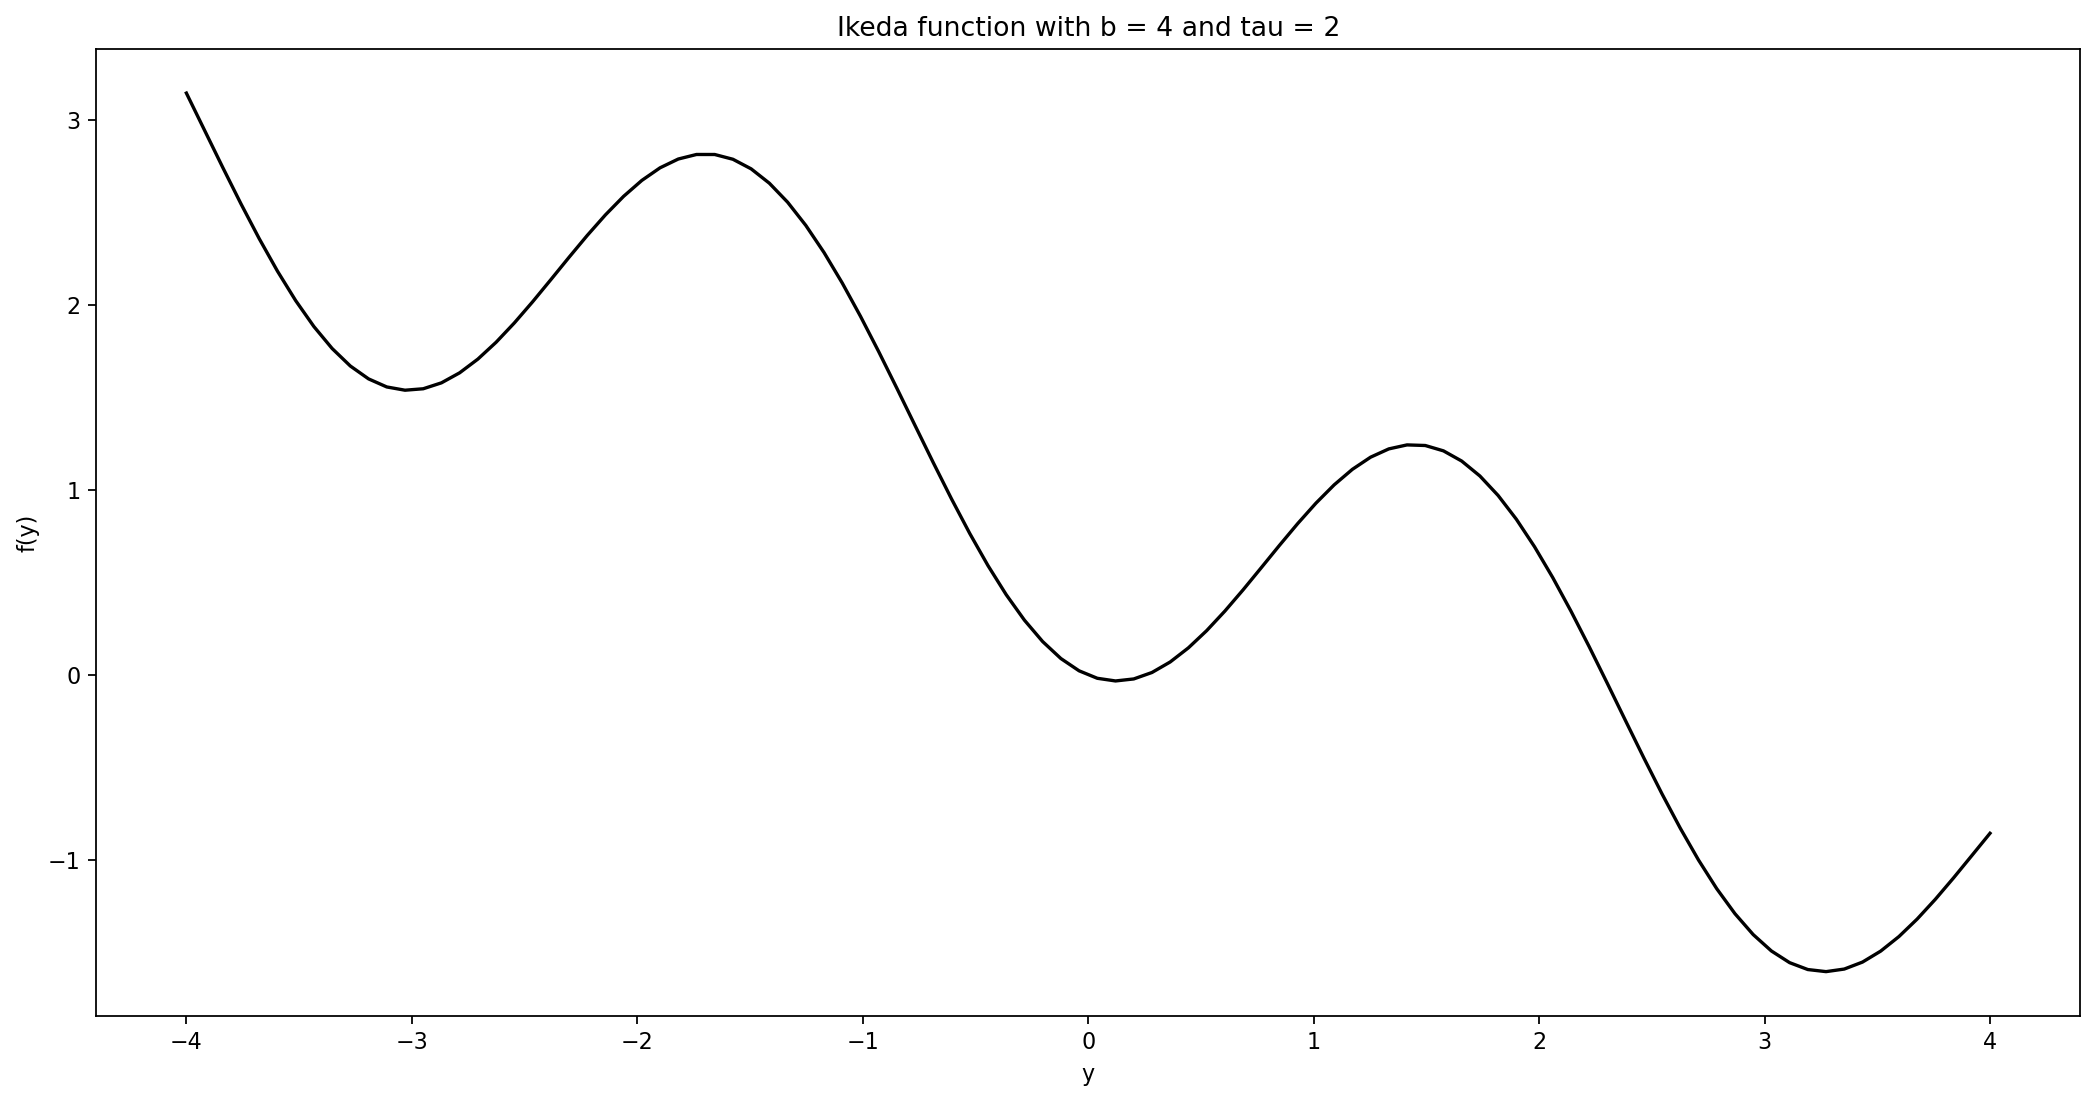

In [16]:
y = np.linspace(-4,4,100)
plt.figure(figsize=(16, 8), dpi=160)
ax = plt.subplot(1,1,1)
ax.plot(y, ikeda(4,2,y), 'k')
plt.title('Ikeda function with b = 4 and tau = 2')
plt.xlabel('y')
plt.ylabel('f(y)')


(0.5, 3.0)

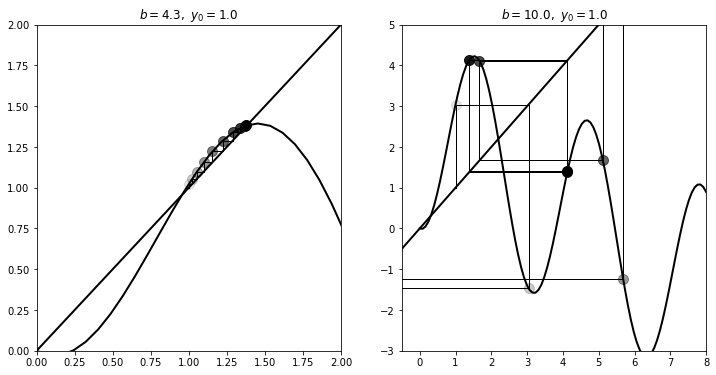

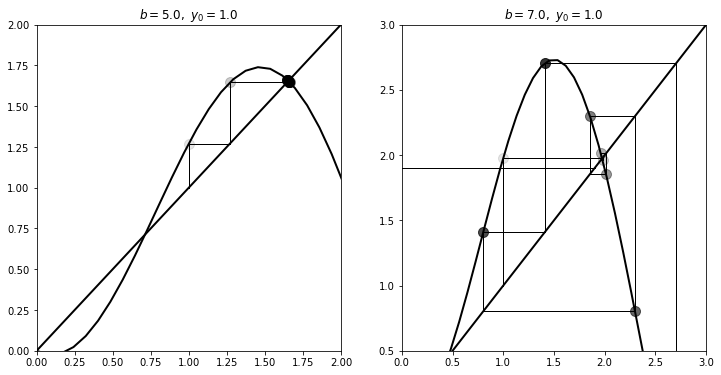

In [17]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6),sharey=False)
fig, (ax3, ax4) = plt.subplots(1,2,figsize=(12,6),sharey=False)
cobweb_plot(4.3,2,1,10,ax=ax1)
cobweb_plot(10,2,1,10,ax=ax2)
cobweb_plot(5,2,1,10,ax=ax3)
cobweb_plot(7,2,1,10,ax=ax4)
ax2.set_xlim(-0.5,8)
ax2.set_ylim(-3,5)
ax4.set_xlim(0,3)
ax4.set_ylim(0.5,3)

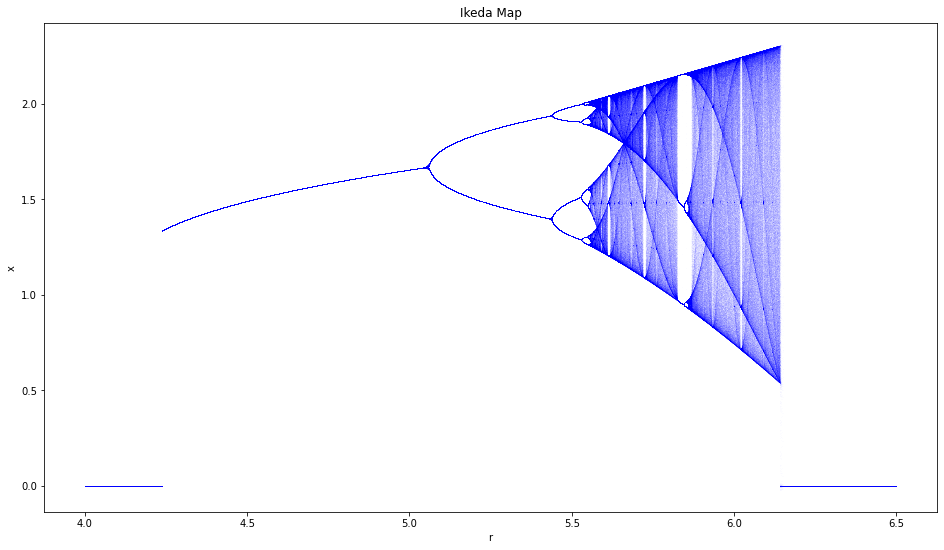

In [18]:
ikeda_map(500, 0.0001, 400, 4, 6.5)


In [23]:
import pylab
def ikeda_map_scatter(reps=1000, accuracy=1000,numstoplot=200, low=4.3, high=10):

    ys = []
    rs = np.linspace(low, high, accuracy)
    for r in rs:
        y = 1
        for i in range(reps-1):
            y = r/2*np.sin(y)**2-y/2
            ys.append([r,y])
    rval = [item[0] for item in ys]
    yval = [item[1] for item in ys]
    
    return pylab.plot(rval[reps-numstoplot:], yval[reps-numstoplot:], color="blue", markersize=.00001)

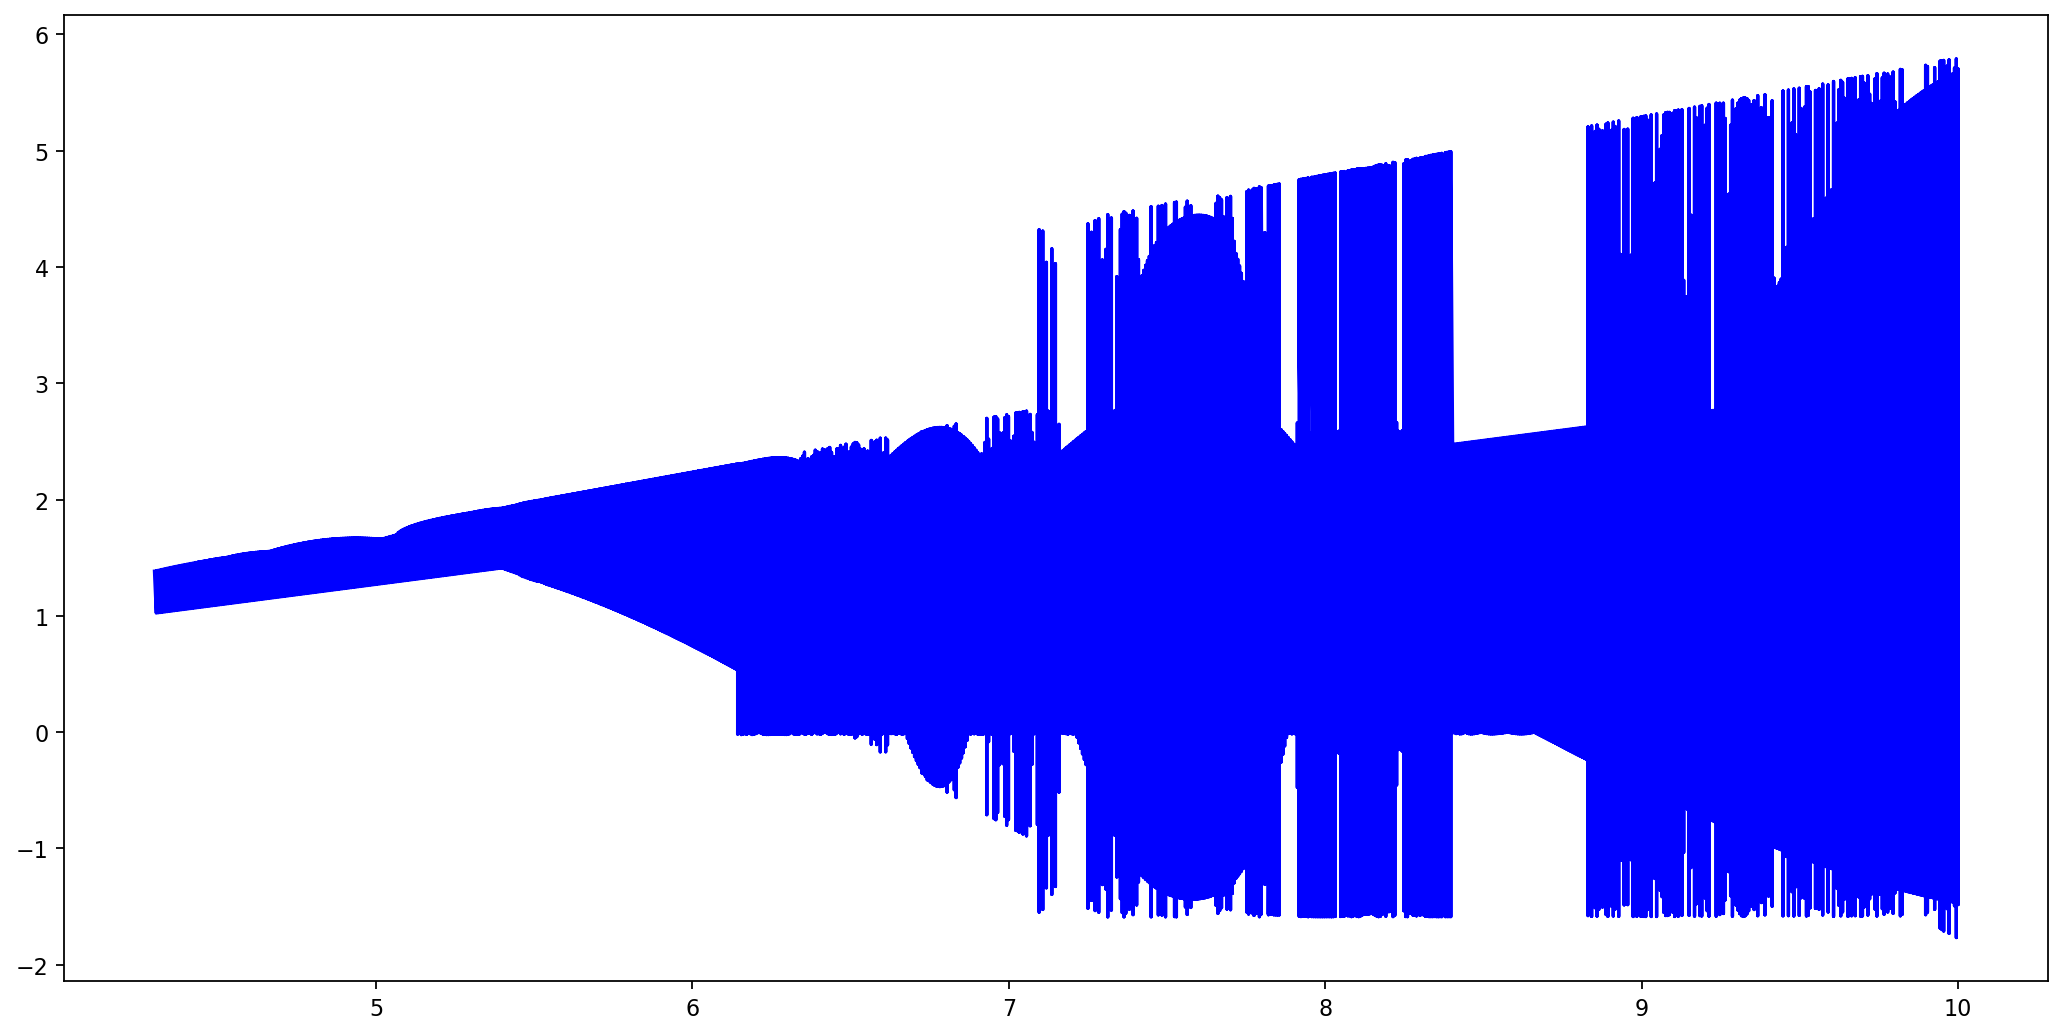

In [25]:
plt.figure(figsize=(16, 8), dpi=160)
ikeda_map_scatter()

[4.3        4.30018002 4.30036004 ... 6.09963996 6.09981998 6.1       ]


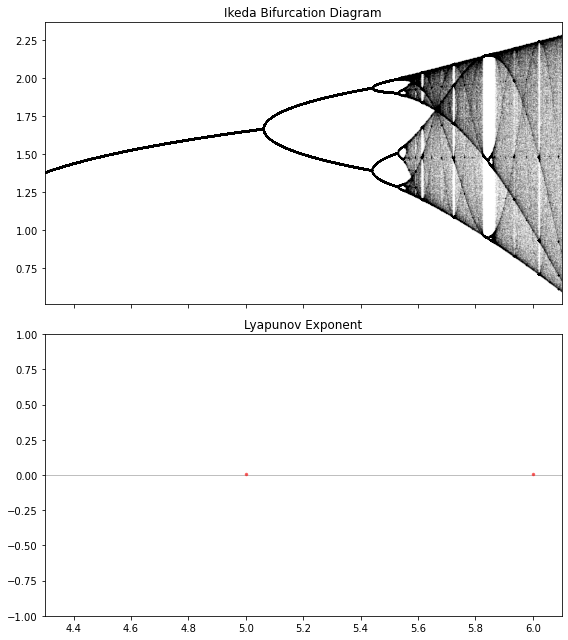

In [26]:
n = 10000
b = np.linspace(4.3,6.1,n)
iterations = 1000
last = 100
tau = 2
y = 1
lyapunov = np.zeros(n)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 9),sharex=True)

for i in range(iterations):
    y = ikeda(b,tau,y)
    lyapunov += np.log(abs(b/2*np.sin(2*y)-1/2))
    if i >= (iterations-last):
        ax1.plot(b,y,'.k', alpha=.25,ms=0.1)
ax1.set_xlim(4.3,6.1)
ax1.set_title("Ikeda Bifurcation Diagram")

ax2.axhline(0, color='k', lw=0.5, alpha=0.5)
ax2.plot(b[lyapunov < 0]/iterations, '.k', alpha=0.5,ms=0.5)
ax2.plot(b[lyapunov >= 0]/iterations, '.r', alpha=0.5,ms=5)

ax2.set_xlim(4.3,6.1)
ax2.set_ylim(-1,1)
ax2.set_title("Lyapunov Exponent")
plt.tight_layout()
print(b)

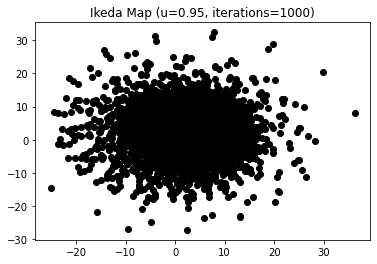

In [14]:
import math

import matplotlib.pyplot as plt
import numpy as np


def main(u, points=200, iterations=1000, nlim=20, limit=False, title=True):
    """
    Params
        u:float
            ikeda parameter
        points:int
            number of starting points
        iterations:int
            number of iterations
        nlim:int
            plot these many last points for 'limit' option. Will plot all points if set to zero
        limit:bool
            plot the last few iterations of random starting points if True. Else Plot trajectories.
        title:[str, NoneType]
            display the name of the plot if the value is affirmative
    """
    
    x = 10 * np.random.randn(points, 1)
    y = 10 * np.random.randn(points, 1)
    
    for n in range(points):
        X = compute_ikeda_trajectory(u, x[n][0], y[n][0], iterations)
        
        if limit:
            plot_limit(X, nlim)
            tx, ty = 2.5, -1.8
            
        else:
            plot_ikeda_trajectory(X)
            tx, ty = -30, -26
    
    plt.title(f"Ikeda Map ({u=:.2g}, {iterations=})") if title else None
    return plt


def compute_ikeda_trajectory(u, x, y, N):
    """
    Calculate a full trajectory
    Params
        u:float
            is the ikeda parameter
        x,y float:
            coordinates of the starting point
        N:int
            the number of iterations
    """
    X = np.zeros((N, 2))
    
    for n in range(N):
        X[n] = np.array((x, y))
        
        t = 0.4 - 6 / (1 + x ** 2 + y ** 2)
        x1 = 1 + u * (x * math.cos(t) - y * math.sin(t))
        y1 = u * (x * math.sin(t) + y * math.cos(t))
        
        x = x1
        y = y1   
        
    return X


def plot_limit(X, n):
    """
    Plot the last n points of the curve - to see end point or limit cycle
    Params
        X:np.array
            trajectory of an associated starting-point
        n:int
            number of "last" points to plot
    """
    plt.plot(X[-n:, 0], X[-n:, 1], 'ko')


def plot_ikeda_trajectory(X):
    """
    Plot the whole trajectory
    Params
        X:np.array
            trajectory of an associated starting-point
    """
    plt.plot(X[:,0], X[:, 1], 'k')


if __name__ == '__main__':
    main(.95, limit=True, nlim=0).show()